In [ ]:
!pip install responsibly

     |████████████████████████████████| 28.2MB 150kB/s 
     |████████████████████████████████| 24.2MB 59.1MB/s 
     |████████████████████████████████| 12.8MB 22.9MB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.5 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.5 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import io
import warnings
warnings.filterwarnings('ignore')

import responsibly

#import fasttext
#import fasttext.util

#from numpy.linalg import norm # normalize regarding a vector (word)

In [ ]:
from gensim.models.keyedvectors import KeyedVectors


wordvectors_file_vec = '/content/fasttext-sbwc.100k.vec'
cantidad = 50000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [ ]:
# L2 (euclidean) normalized vectors (without a center!)
wordvectors.init_sims(replace=True)

In [ ]:
# Creamos el centro en base a la dirección deseada
gdirection = wordvectors['mujer'] - wordvectors['hombre']
gdirection


array([-5.84656000e-03,  7.74329454e-02, -1.43896714e-02,  6.69480190e-02,
        3.34946886e-02, -2.76196375e-02, -5.24447933e-02,  3.46867181e-02,
       -1.37887076e-02, -3.72997299e-02, -2.52500717e-02,  5.13225943e-02,
       -3.83549929e-03, -5.23223504e-02, -3.73840779e-02, -1.31343342e-02,
       -1.34903654e-01, -8.08988214e-02,  3.00732218e-02, -5.04217930e-02,
        7.39826784e-02, -2.48072557e-02, -4.55818176e-02, -5.33082969e-02,
        3.38839591e-02,  7.70126283e-03, -4.15441841e-02,  2.42943466e-02,
        2.46817656e-02,  1.74174625e-02,  3.38096023e-02,  4.50458638e-02,
        2.19730735e-02,  3.71532980e-04, -7.66526014e-02, -3.76945697e-02,
        9.31684449e-02,  3.09700482e-02, -5.76075912e-02,  9.70911384e-02,
        4.64721359e-02, -9.80491042e-02,  2.69910917e-02, -7.24220425e-02,
       -7.02564372e-03,  1.96690261e-02,  4.04934399e-02,  1.18677504e-02,
        2.21216455e-02, -4.17231768e-03,  3.01209055e-02,  7.35590532e-02,
        5.58096878e-02,  

In [ ]:
#normalizamos
gender_direction =gdirection
gender_direction /= norm(gdirection)

In [ ]:
# En este caso normalizamos en base a la palabra elegida
from numpy.linalg import norm

norm(wordvectors['gato'])

0.99999994

In [ ]:
# asegurémonos que todos los vectores están normalizados

from numpy.testing import assert_almost_equal

length_vectors = norm(wordvectors.vectors, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

In [184]:
# Pipeline for gender direction, normalized (between man and women 1)
gdirection_norm=norm(wordvectors['hombre']-wordvectors['mujer'])
gdirection = (wordvectors['hombre']-wordvectors['mujer']) /gdirection_norm
gdirection # 0.80922437 if not normalized
display(gdirection, gdirection_norm, norm(gdirection))
direction_vector_femine = [
gdirection @ wordvectors['mujer'],
gdirection @ wordvectors['luchadora'],
gdirection @ wordvectors['gata'],
gdirection @ wordvectors['mujer'],
gdirection @ wordvectors['abogada'] ]
direction_vector_masculine = [
gdirection @ wordvectors['hombre'],
gdirection @ wordvectors['luchador'],
gdirection @ wordvectors['gato'],
gdirection @ wordvectors['abogado'] ]
direction_vector_neutral = [
gdirection @ (wordvectors['hombre']+wordvectors['mujer']), # Oficially zero
gdirection @ wordvectors['taxista'],
gdirection @ wordvectors['economista']
]
df={}
df['fem']= direction_vector_femine
df['masc']=direction_vector_masculine
df['neutral']=direction_vector_neutral
df

array([ 6.49928581e-03, -8.60778317e-02,  1.59961823e-02, -7.44223297e-02,
       -3.72341424e-02,  3.07031889e-02,  5.82999103e-02, -3.85592692e-02,
        1.53281176e-02,  4.14640009e-02,  2.80690752e-02, -5.70524298e-02,
        4.26370325e-03,  5.81637956e-02,  4.15577590e-02,  1.46006942e-02,
        1.49964780e-01,  8.99306536e-02, -3.34307030e-02,  5.60510568e-02,
       -8.22423697e-02,  2.75768191e-02,  5.06707281e-02,  5.92598170e-02,
       -3.76668796e-02, -8.56107473e-03,  4.61823232e-02, -2.70066503e-02,
       -2.74373200e-02, -1.93620082e-02, -3.75842191e-02, -5.00749350e-02,
       -2.44262218e-02, -4.13012720e-04,  8.52103606e-02,  4.19029221e-02,
       -1.03570089e-01, -3.44276540e-02,  6.40391111e-02, -1.07930735e-01,
       -5.16604483e-02,  1.08995639e-01, -3.00044771e-02,  8.05074871e-02,
        7.81001151e-03, -2.18649432e-02, -4.50142659e-02, -1.31927105e-02,
       -2.45913733e-02,  4.63812100e-03, -3.34837027e-02, -8.17714483e-02,
       -6.20404780e-02, -

0.89956903

0.99999994

{'fem': [-0.4497844, -0.101356246, 0.052882113, -0.4497844, -0.17852865],
 'masc': [0.4497846, 0.23832466, 0.24687268, 0.08765198],
 'neutral': [2.0037987e-07, 0.18955265, 0.05620554]}

In [ ]:
import numpy as np
def cosine_similarity(vec1, vec2):
    len1 = np.linalg.norm(vec1)
    len2 = np.linalg.norm(vec2)
    dot_product = np.dot(vec1, vec2)
    return dot_product / (len1 * len2)

In [ ]:
cosine_similarity(wordvectors['dirigente'], wordvectors['mujer'])

0.16438076

In [ ]:
wordvectors['dirigente'] @ wordvectors['mujer']

0.16438074

In [166]:
wordvectors['dirigente'] @ wordvectors['hombre']

0.31507134

## Diagnóstico de sesgo de género

In [ ]:
wordvectors.most_similar(positive=['medico', 'hombre'],negative=['él'])


[('médico', 0.5129855871200562),
 ('medica', 0.4775370657444),
 ('médica', 0.4521704912185669),
 ('indigente', 0.44227153062820435),
 ('cirujano', 0.44039732217788696),
 ('ginecólogo', 0.44004788994789124),
 ('enfermero', 0.4381885826587677),
 ('paciente', 0.42837029695510864),
 ('clínica', 0.4262891411781311),
 ('paramédico', 0.42429089546203613)]

In [ ]:
wordvectors.most_similar(positive=['carpintería', 'él'],negative=['ella'])


[('albañilería', 0.6682113409042358),
 ('herrería', 0.6483407020568848),
 ('cantería', 0.5699968338012695),
 ('muebles', 0.5180044174194336),
 ('carpintero', 0.5170474052429199),
 ('albañil', 0.5152691602706909),
 ('fundición', 0.5136929750442505),
 ('carpinteros', 0.5130808353424072),
 ('panadería', 0.5129778981208801),
 ('ferretería', 0.5049254298210144)]

In [ ]:
wordvectors.most_similar(positive=['carpintería', 'ella'],negative=['él'])


[('herrería', 0.687015175819397),
 ('albañilería', 0.682686448097229),
 ('cantería', 0.6189953088760376),
 ('costura', 0.5994037389755249),
 ('madera', 0.5699216723442078),
 ('alfarería', 0.5670095682144165),
 ('peluquería', 0.5617238283157349),
 ('tapicería', 0.5588425397872925),
 ('panadería', 0.5554421544075012),
 ('artesanía', 0.54728102684021)]

In [ ]:
wordvectors.most_similar(positive=['carpintero', 'él'],negative=['ella'])


[('carpinteros', 0.6591194272041321),
 ('albañil', 0.6045953035354614),
 ('pescador', 0.5243479609489441),
 ('perico', 0.5108636617660522),
 ('tejedor', 0.5063521862030029),
 ('gavilán', 0.5057181119918823),
 ('constructor', 0.5012984275817871),
 ('amigo', 0.5007154941558838),
 ('artesano', 0.49700891971588135),
 ('pájaro', 0.48895367980003357)]

In [ ]:
wordvectors.most_similar(positive=['carpintero', 'ella'],negative=['él'])


[('carpinteros', 0.6715471744537354),
 ('albañil', 0.5610324144363403),
 ('cocinera', 0.5546947121620178),
 ('pescador', 0.5394402146339417),
 ('golondrina', 0.5374129414558411),
 ('pájaro', 0.5061110854148865),
 ('carpintería', 0.5000944137573242),
 ('criada', 0.49921005964279175),
 ('urraca', 0.4912218749523163),
 ('sirvienta', 0.49031728506088257)]

In [170]:
wordvectors.most_similar(positive=['dirigente', 'hombre'],negative=['mujer'])


[('líder', 0.6439098119735718),
 ('carismático', 0.542842447757721),
 ('militante', 0.53902268409729),
 ('simpatizante', 0.5311943888664246),
 ('ideólogo', 0.5171741247177124),
 ('veterano', 0.5089927911758423),
 ('dirigencia', 0.4973352551460266),
 ('sindicalista', 0.4910968244075775),
 ('empresario', 0.4763525724411011),
 ('seguidor', 0.4746392071247101)]

In [171]:
wordvectors.most_similar(positive=['dirigente', 'mujer'],negative=['hombre'])


[('coordinadora', 0.5368133187294006),
 ('diputada', 0.5227832794189453),
 ('dirigencia', 0.5187094807624817),
 ('tesorera', 0.5174612402915955),
 ('secretaria', 0.5099249482154846),
 ('dirigentes', 0.4934179186820984),
 ('empresaria', 0.48275068402290344),
 ('presidenta', 0.4817776083946228),
 ('senadora', 0.47393062710762024),
 ('regidora', 0.473734974861145)]

In [173]:
profesiones_neutras = ['docente',
'estudiante',
'guardia',
'custodia',
'chef',
'militante',
'cantante',
'pianista',
'dentista',
'violinista',
'deportista',
'estadista',
'economista',
'artista',
'vidente',
'agente',
'accionista',
'militar',
'policía',
'espía',
'líder',
'analista',
'asistente',
'auxiliar',
'almirante',
'chofer',
'albañil',
'representante',
'contratista',
'taxista',
'recepcionista',
'terapeuta',
'pediatra',
'psiquiatra',
'periodista',
'testigo',
'víctima',
'atleta',
'cineasta',
'colega',
'corresponsal',
'futbolista',
'astronauta',
'modelo',
'piloto',
'tenista',
'cónsul',
'capataz',
'portavoz',
'guía',
'electricista',
]

In [174]:
profesiones_neutras = sorted(profesiones_neutras, key=str.lower)


profesiones_neutras

['accionista',
 'agente',
 'albañil',
 'almirante',
 'analista',
 'artista',
 'asistente',
 'astronauta',
 'atleta',
 'auxiliar',
 'cantante',
 'capataz',
 'chef',
 'chofer',
 'cineasta',
 'colega',
 'contratista',
 'corresponsal',
 'custodia',
 'cónsul',
 'dentista',
 'deportista',
 'docente',
 'economista',
 'electricista',
 'espía',
 'estadista',
 'estudiante',
 'futbolista',
 'guardia',
 'guía',
 'líder',
 'militante',
 'militar',
 'modelo',
 'pediatra',
 'periodista',
 'pianista',
 'piloto',
 'policía',
 'portavoz',
 'psiquiatra',
 'recepcionista',
 'representante',
 'taxista',
 'tenista',
 'terapeuta',
 'testigo',
 'vidente',
 'violinista',
 'víctima']

In [175]:
print (len(profesiones_neutras))

51


In [176]:
#Medicion directa del sesgo


neutral_profession_projections = [wordvectors[word] @ gdirection
                                  for word in profesiones_neutras]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

0.08520146970655404

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
#funcion helper
import pandas as pd
def take_two_sides_extreme_sorted(df, n_extreme,
                                  part_column=None,
                                  head_value='',
                                  tail_value=''):
    head_df = df.head(n_extreme)[:]
    tail_df = df.tail(n_extreme)[:]

    if part_column is not None:
        head_df[part_column] = head_value
        tail_df[part_column] = tail_value

    return (pd.concat([head_df, tail_df])
            .drop_duplicates()
            .reset_index(drop=True))


In [179]:
#Funcion para plotear proyecciones
def plot_projection_scores( words, n_extreme=10,
                               ax=None, axis_projection_step=None):
        """Plot the projection scalar of words on the direction.

        :param list words: The words tor project
        :param int or None n_extreme: The number of extreme words to show
        :return: The ax object of the plot
        """

        #self._is_direction_identified()

        projections_df = pd.DataFrame({'projection':[wordvectors[word] @ gdirection
                                  for word in words],
                                  'word':words})
        projections_df['projection'] = projections_df['projection'].round(2)
        projections_df= projections_df.sort_values(by='projection',ascending=False)

       # if n_extreme is not None:
        #    projections_df = take_two_sides_extreme_sorted(projections_df,
         #                                                  n_extreme=n_extreme)

        if ax is None:
            _, ax = plt.subplots(1)

        if axis_projection_step is None:
            axis_projection_step = 0.1

        cmap = plt.get_cmap('RdBu')
        projections_df['color'] = ((projections_df['projection'] + 0.5)
                                   .apply(cmap))

        most_extream_projection = np.round(
            projections_df['projection']
            .abs()
            .max(),
            decimals=1)

        sns.barplot(x='projection', y='word', data=projections_df,
                    palette=projections_df['color'])

        plt.xticks(np.arange(-most_extream_projection,
                             most_extream_projection + axis_projection_step,
                             axis_projection_step))
        plt.title('← {} {} {} →'.format('él',
                                        ' ' * 20,
                                        'ella'))

        plt.xlabel('Direction Projection')
        plt.ylabel('Words')

        return ax


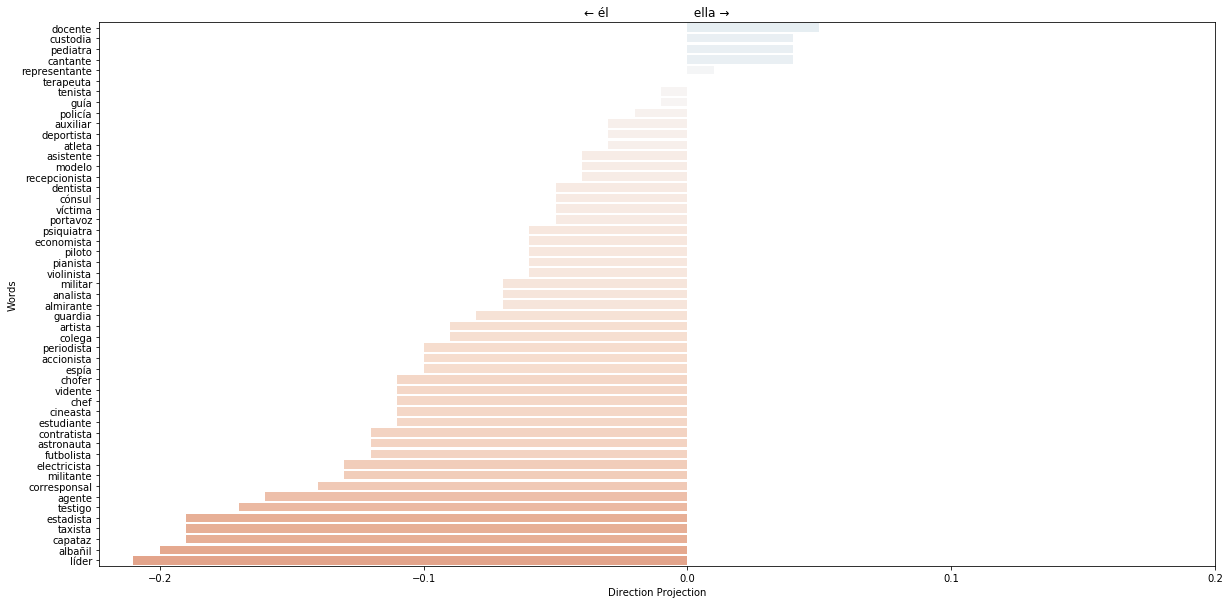

In [180]:

f, ax = plt.subplots(1, figsize=(20, 10))
plot_projection_scores(profesiones_neutras,n_extreme=51, ax= ax)


In [ ]:
# TODO: Neutralizar y/o ecualizar

In [108]:
gdirection @ wordvectors['bailarina']

0.096854694

In [123]:
# TODO: determiniar la dirección del género a partir de la resta de pares y aplicadno pca/svd. Pregunta: si a las restas de pares
# les aplicamos pca o svd obtendríamos un vector resultante de, por ejemplo, 2 componentes, es correcta esa dimension del vector resultante
# para realizar operaciones??


## Neutralizar
After obtaining the bias direction b, we’ll remove the bias components from all gender-neutral words like receptionist and surgeon by subtracting the embedding’s projection onto the bias axis b (using the dot product of e & b). 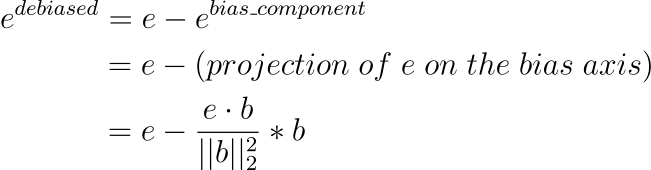


Fuente: https://hackernoon.com/how-to-remove-gender-bias-in-machine-learning-models-nlp-and-word-embeddings-u0533ugl



Proyectar """Projecting the vector v onto direction u."""
(v @ normalize_u) * normalize_u


extraer proyeccion
"""Rejecting the vector v onto direction u."""
   v - project_vector(v, u)

In [163]:
#Neutralizamos la palabra 'albañil' y obtenemos la similaridad coseno
albañil_debiased = wordvectors['albañil'] - (wordvectors['albañil'] @ gdirection)*gdirection
albañil_debiased @ gdirection

-1.9845174e-09

In [182]:
#Nautralizamos todas los nombres de profesiones neutros y lo guardamos en un dataframe
debiased_projections_df = pd.DataFrame({'projection':[(wordvectors[word] - (wordvectors[word] @ gdirection) * gdirection) @ gdirection
                                  for word in profesiones_neutras],
                                  'word':profesiones_neutras})


Text(0,0.5,'Words')

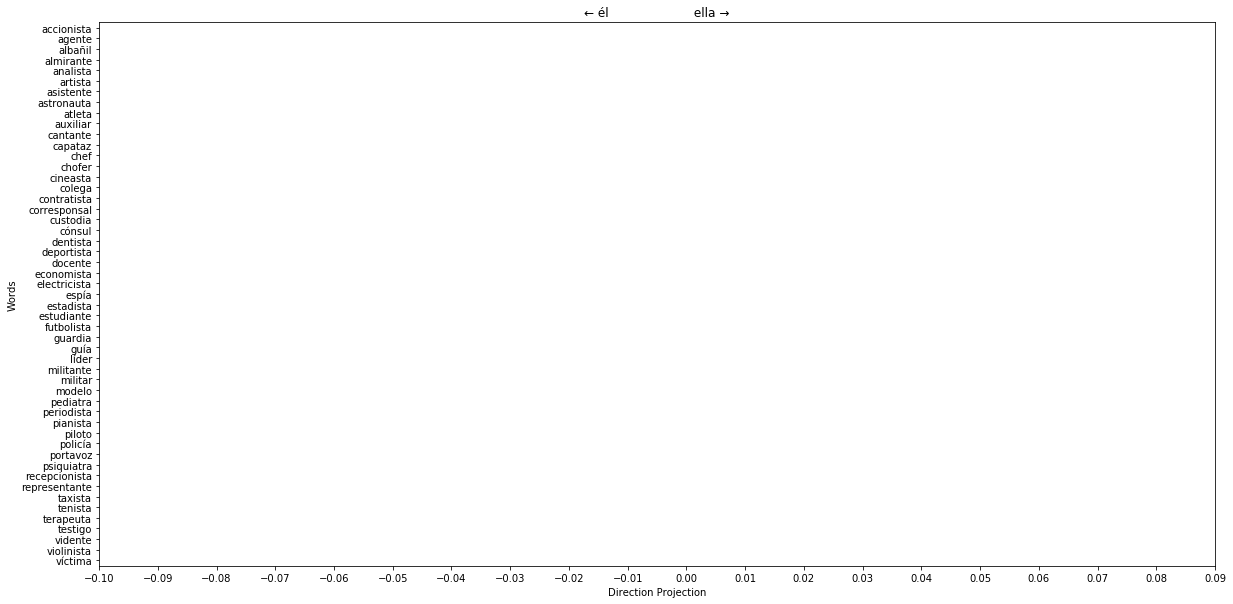

In [183]:
#Graficamos
f, ax = plt.subplots(1, figsize=(20, 10))

sns.barplot(x='projection', y='word', data=debiased_projections_df)

plt.xticks(np.arange(-0.1, 0.1, step=0.01))

plt.title('← {} {} {} →'.format('él',
                                ' ' * 20,
                                'ella'))

plt.xlabel('Direction Projection')
plt.ylabel('Words')
